# Partie 1. Création des image numériques

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import math
from scipy import ndimage 

### Partie 1(a). Création des images binaire et d’intensités

1) Créer un triangle blanc inférieur sur un fond noir de taille 10 x10 pixels (Fig. 1).

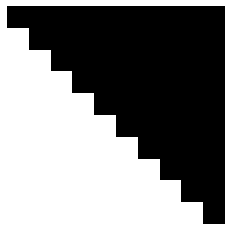

In [2]:
n = 10

img = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i > j : img[i, j] = 1 

plt.axis('off')  # Désactive les axes
plt.imshow(img, cmap='gray')
plt.savefig('img/fig1.png')

2) Crée un triangle blanc en haut dans un fond noir de taille NLxNC (avec NL=NC=100) et un triangle blanc en bas dans un fond noir de taille NL x NC, puis les visualiser (Fig. 2a, 2b)

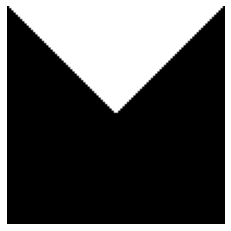

In [3]:
n = 100

img = np.zeros((n, n))

for i in range(int(n/2)):
    for j in range(int(n/2)):
        if i < j : 
            img[i, j] = 1 
            img[i, n-j-1] = 1 

plt.axis('off')  # Désactive les axes
plt.imshow(img, cmap='gray')
plt.savefig('img/triangle1.png')

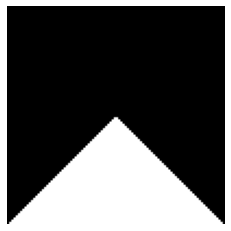

In [4]:
n = 100

img = np.zeros((n, n))

for i in range(int(n/2)):
    for j in range(int(n/2)):
        if i < j : 
            img[n-i-1, j] = 1 
            img[n-i-1, n-j-1] = 1 

plt.axis('off')  # Désactive les axes
plt.imshow(img, cmap='gray')
plt.savefig('img/triangle2.png')

3) Créer une image binaire alternée de dimension NxN avec N=100 (les pixels dont le numéro est impair ont la valeur 0, pair la valeur 1). Fig.3

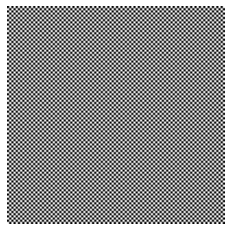

In [5]:
n = 100

img = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        img[i, j] = (i+j) % 2

    
plt.axis('off')  # Désactive les axes
plt.imshow(img, cmap='gray')

4) Créer une image d’intensités (en niveaux de gris) dégradée en ligne d’un rectangle de taille 10 x 8 (Fig.4)

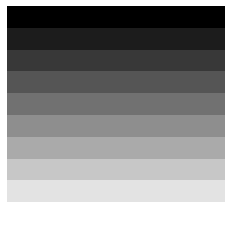

In [6]:
n = 10
m = 8

img = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        img[i, j] = i

plt.axis('off')  # Désactive les axes
plt.imshow(img, cmap='gray')

5) Créer une image, de dimension NxN (avec N=50, puis N=100), de niveaux de gris
progressifs en fonction de position de pixel (la valeur de chaque pixel dépend de la position
de ce pixel dans la matrice de NxN). Fig. 5
Attention à la normalisation : les niveaux de gris doivent être entre [0,1] ou bien [0, 255]

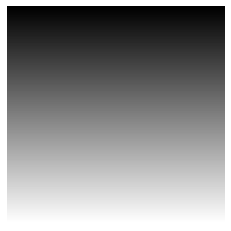

In [7]:
n = 100

img = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        img[i, j] = i 

plt.axis('off')  # Désactive les axes
plt.imshow(img, cmap='gray')

### Partie 1(b). Image Couleur

6) Création d'image couleur RGB

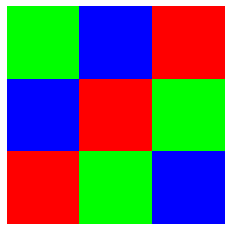

In [8]:
R = np.array([[0, 0, 255], [0, 255, 0], [255, 0, 0]])
V = np.array([[255, 0, 0], [0, 0, 255], [0, 255, 0]])
B = np.array([[0, 255, 0], [255, 0, 0], [0, 0, 255]])

plt.axis('off')  # Désactive les axes
plt.imshow(np.dstack((R,V,B)))

7) Création des images couleurs indexées

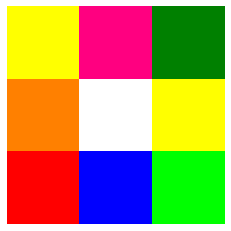

In [9]:
map = np.array([[255, 255, 0], # jaune
                [255, 0, 128], # violet
                [0, 128, 0], # vert foncé
                [255, 128, 0], # orange
                [255, 255, 255], # blanc
                [255, 0, 0], # rouge
                [0, 0, 255], # bleu
                [0, 255, 0], # vert
                ])

I = np.array([[0, 1, 2], 
              [3, 4, 0], 
              [5, 6, 7]])

plt.axis('off')  # Désactive les axes
plt.imshow(map[I])

# Partie 2. Histogramme des niveaux de gris d’images et transformations d’histogramme

1) Écrire les algorithmes du CALCUL, de l’ETIREMENT et de l’EGALISATION de
l’histogramme des niveaux de gris d’une image de taille NLxNC et de 256 niveaux de
gris entre 0 (noir) et 255 (blanc).

In [10]:

# Fonction pour calculer l'histogramme d'une image en niveaux de gris
def calculer_histogramme(image):
    histogramme = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogramme[pixel] += 1
    return histogramme

# Fonction pour effectuer l'étirement de l'histogramme
def etirer_histogramme(image, nouv_min=0, nouv_max=255):
    min_original = np.min(image)
    max_original = np.max(image)
    image_etiree = (image - min_original) * (nouv_max - nouv_min) / (max_original - min_original) + nouv_min
    return np.round(image_etiree).astype(np.uint8)

# Fonction pour effectuer l'égalisation de l'histogramme
def egaliser_histogramme(image):
    histogramme = calculer_histogramme(image)
    cdf = np.cumsum(histogramme)
    cdf_min = np.min(cdf)
    image_egalisee = ((cdf[image] - cdf_min) / (np.prod(image.shape) - cdf_min) * 255).astype(np.uint8)
    return image_egalisee

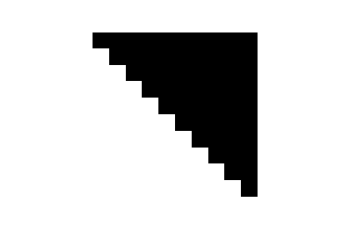

In [11]:
image = np.array(Image.open('img/fig1.png').convert('L'))

if image is not None:
    plt.axis('off')  # Désactive les axes
    plt.imshow(image, cmap='gray')

    # Calculez l'histogramme
    histogramme = calculer_histogramme(image)

    # Appliquez l'étirement de l'histogramme (par exemple, étiré entre 50 et 200)
    image_etiree = etirer_histogramme(image, nouv_min=50, nouv_max=200)
    plt.imshow(image_etiree, cmap='gray')

    # Appliquez l'égalisation de l'histogramme
    image_egalisee = egaliser_histogramme(image)
    plt.imshow(image_egalisee, cmap='gray')
else:
    print("Erreur lors du chargement de l'image.")

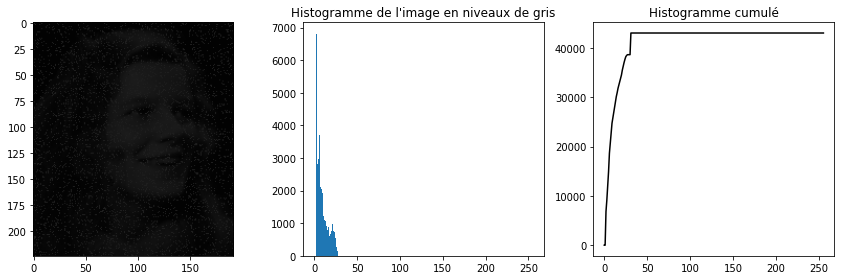

In [12]:
image = np.array(Image.open('img/histo_imageTest_entree_3D.png').convert('L'))
image_to_show = cv2.imread('img/histo_imageTest_entree_3D.png')
image_to_show = cv2.cvtColor(image_to_show, cv2.COLOR_BGR2RGB)

# Calculez l'histogramme de l'image en niveaux de gris
histogram = np.histogram(image, bins=256, range=(0, 256))[0]

# Calculez l'histogramme cumulé
cumulative_histogram = np.cumsum(histogram)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_to_show)

# Afficher l'histogramme
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), histogram, width=1.0)
plt.title("Histogramme de l'image en niveaux de gris")

# Afficher l'histogramme cumulé
plt.subplot(1, 3, 3)
plt.plot(cumulative_histogram, color='black')
plt.title("Histogramme cumulé")

plt.tight_layout()
plt.show()

In [13]:
# Étirez l'histogramme
min_pixel_value = np.min(image)
max_pixel_value = np.max(image)
stretched_image = ((image - min_pixel_value) / (max_pixel_value - min_pixel_value) * 255).astype(np.uint8)

# Calculez l'histogramme de l'image étirée
stretched_histogram = np.histogram(stretched_image, bins=256, range=(0, 256))[0]

# Calculez l'histogramme cumulé de l'image étirée
stretched_cumulative_histogram = np.cumsum(stretched_histogram)

# Égalisez l'histogramme
equalized_image = cv2.equalizeHist(image)

# Calculez l'histogramme de l'image égalisée
equalized_histogram = np.histogram(equalized_image, bins=256, range=(0, 256))[0]

# Calculez l'histogramme cumulé de l'image égalisée
equalized_cumulative_histogram = np.cumsum(equalized_histogram)

In [14]:
image = Image.fromarray(stretched_image.astype('uint8'))
image.save('img/stretched_image.png')

In [15]:
image = Image.fromarray(equalized_image.astype('uint8'))
image.save('img/equalized_image.png')

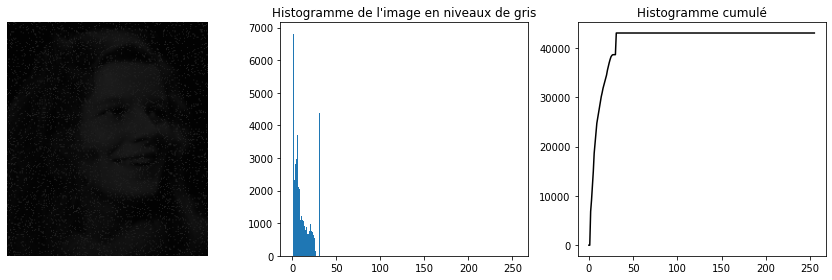

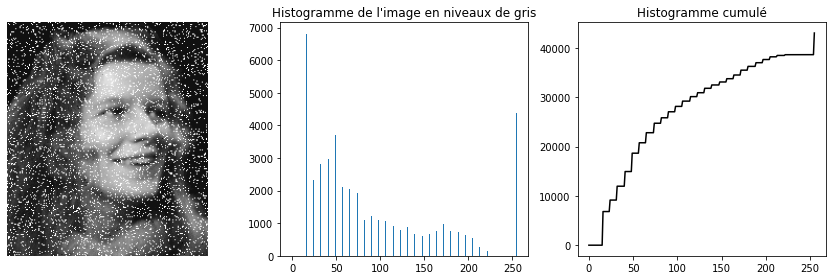

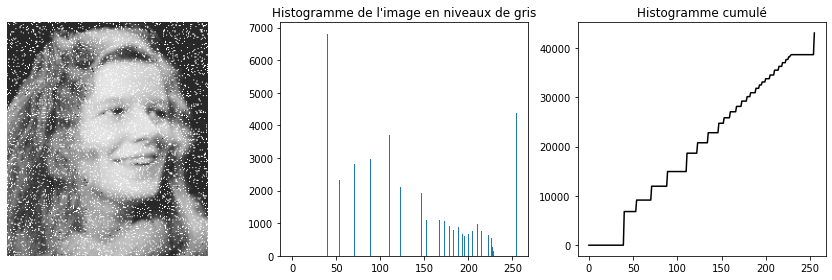

In [16]:
# Image originale
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_to_show)
plt.axis('off')  # Désactive les axes

# Afficher l'histogramme
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), histogram, width=1.0)
plt.title("Histogramme de l'image en niveaux de gris")

# Afficher l'histogramme cumulé
plt.subplot(1, 3, 3)
plt.plot(cumulative_histogram, color='black')
plt.title("Histogramme cumulé")

plt.tight_layout()
plt.show()

stretched_image_to_show = cv2.imread('img/stretched_image.png')
stretched_image_to_show = cv2.cvtColor(stretched_image_to_show, cv2.COLOR_BGR2RGB)

# Image étirée
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(stretched_image_to_show)
plt.axis('off')  # Désactive les axes

# Afficher l'histogramme
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), stretched_histogram, width=1.0)
plt.title("Histogramme de l'image en niveaux de gris")

# Afficher l'histogramme cumulé
plt.subplot(1, 3, 3)
plt.plot(stretched_cumulative_histogram, color='black')
plt.title("Histogramme cumulé")

plt.tight_layout()
plt.show()


equalized_image_to_show = cv2.imread('img/equalized_image.png')
equalized_image_to_show = cv2.cvtColor(equalized_image_to_show, cv2.COLOR_BGR2RGB)

# Image égalisée
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(equalized_image_to_show)
plt.axis('off')  # Désactive les axes

# Afficher l'histogramme
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), equalized_histogram, width=1.0)
plt.title("Histogramme de l'image en niveaux de gris")

# Afficher l'histogramme cumulé
plt.subplot(1, 3, 3)
plt.plot(equalized_cumulative_histogram, color='black')
plt.title("Histogramme cumulé")

plt.tight_layout()
plt.show()

# Partie 3. Réduction de bruit (Débruitage)

In [17]:
image_originale = cv2.imread('img/lena.jpg', cv2.IMREAD_GRAYSCALE)  # Charger l'image en niveaux de gris

# Ajouter du bruit gaussien
mean = 0
variance = 0.04 * np.max(image_originale)  # Variance pour un bruit gaussien de 4%
bruit_gaussien = np.random.normal(mean, np.sqrt(variance), image_originale.shape).astype(np.uint8)
image_bruitee_gaussienne = cv2.add(image_originale, bruit_gaussien)

# Ajouter du bruit salt & pepper
bruit_salt_pepper = np.random.choice([0, 255], size=image_originale.shape, p=[0.98, 0.02]).astype(np.uint8)
image_bruitee_salt_pepper = cv2.add(image_originale, bruit_salt_pepper)

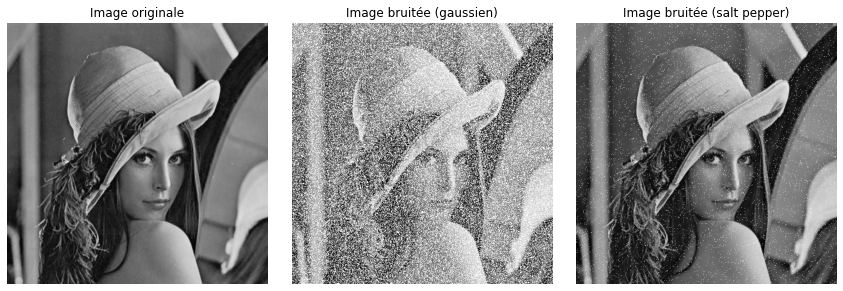

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_bruitee_gaussienne, cv2.COLOR_BGR2RGB))
plt.title("Image bruitée (gaussien)")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_bruitee_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title("Image bruitée (salt pepper)")
plt.axis('off')  # Désactive les axes

plt.tight_layout()
plt.show()

In [19]:
# Définir le noyau du filtre moyenneur 5x5
kernel = np.ones((5, 5), np.float32) / 25

# Appliquer le filtre moyenneur sur l'image bruitée avec bruit gaussien
image_filtree_gaussienne = cv2.filter2D(image_bruitee_gaussienne, -1, kernel)

# Appliquer le filtre moyenneur sur l'image bruitée avec bruit salt & pepper
image_filtree_salt_pepper = cv2.filter2D(image_bruitee_salt_pepper, -1, kernel)

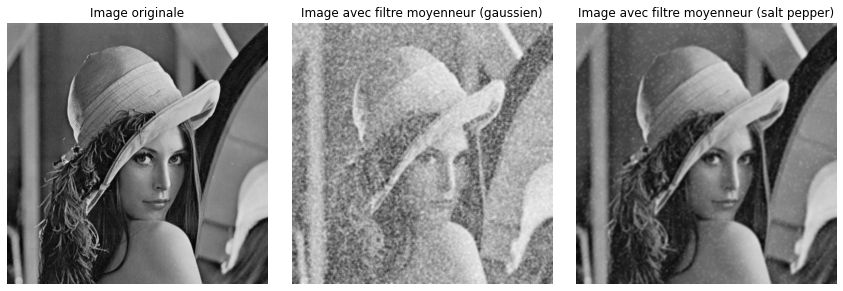

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_filtree_gaussienne, cv2.COLOR_BGR2RGB))
plt.title("Image avec filtre moyenneur (gaussien)")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_filtree_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title("Image avec filtre moyenneur (salt pepper)")
plt.axis('off')  # Désactive les axes

plt.tight_layout()
plt.show()

In [21]:
# Appliquer le filtre médian sur l'image bruitée avec bruit gaussien
image_filtree_median_gaussienne = cv2.medianBlur(image_bruitee_gaussienne, 5)  # Taille du noyau : 5x5

# Appliquer le filtre médian sur l'image bruitée avec bruit salt & pepper
image_filtree_median_salt_pepper = cv2.medianBlur(image_bruitee_salt_pepper, 5)  # Taille du noyau : 5x5

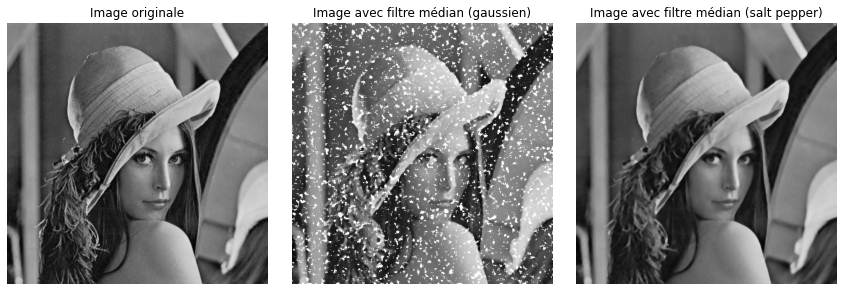

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_filtree_median_gaussienne, cv2.COLOR_BGR2RGB))
plt.title("Image avec filtre médian (gaussien)")
plt.axis('off')  # Désactive les axes

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_filtree_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title("Image avec filtre médian (salt pepper)")
plt.axis('off')  # Désactive les axes

plt.tight_layout()
plt.show()

### Atténuation du bruit :

- Plus la largeur du filtre moyenneur est grande (par exemple, 5x5 ou 7x7), plus il est efficace pour atténuer le bruit. Un filtre plus large prend en compte un plus grand nombre de pixels voisins et tend à lisser l'image, ce qui réduit le bruit.
- Cependant, il est important de noter que l'atténuation du bruit est meilleure pour le bruit gaussien que pour le bruit salt & pepper. Le filtre moyenneur peut réduire efficacement le bruit gaussien, mais il peut ne pas être aussi efficace pour le bruit salt & pepper, car il remplace le pixel central par une moyenne, ce qui peut ne pas éliminer complètement les valeurs extrêmes.

### Détérioration des détails :

- À mesure que la largeur du filtre moyenneur augmente, la détérioration des détails augmente également. Un filtre plus large lisse davantage l'image, ce qui signifie qu'il peut éliminer non seulement le bruit, mais aussi les détails fins de l'image.
- Cela se traduit par une perte de netteté des contours et des bords. Les transitions abruptes dans l'image deviennent plus douces, ce qui peut donner une apparence floue à certains détails.


Le choix de la largeur adaptée ou optimale du filtre moyenneur dépend du compromis entre l'atténuation du bruit et la préservation des détails. Voici quelques conseils pour choisir la largeur optimale :
- Pour le bruit gaussien, vous pouvez utiliser un filtre moyenneur de taille relativement grande (par exemple, 5x5 ou 7x7) pour une atténuation efficace du bruit tout en minimisant la détérioration des détails.
- Pour le bruit salt & pepper, il est généralement préférable d'utiliser un filtre médian plutôt qu'un filtre moyenneur. Le filtre médian est plus efficace pour éliminer ce type de bruit tout en préservant les contours et les détails.
- Si vous souhaitez appliquer un filtre moyenneur pour le bruit salt & pepper, vous pouvez essayer différentes tailles de filtre et observer l'effet sur l'image. Choisissez la taille qui offre le meilleur compromis entre la réduction du bruit et la préservation des détails.


En résumé, le choix de la largeur du filtre moyenneur dépend du type de bruit dans l'image et de l'importance des détails à conserver. Il n'y a pas de taille unique qui convienne à toutes les situations, il faut expérimenter pour trouver le bon équilibre entre réduction du bruit et préservation des détails. Pour le bruit salt & pepper, le filtre médian est souvent préférable en raison de sa capacité à éliminer le bruit tout en préservant les détails.